<a href="https://colab.research.google.com/github/peniel7/Peniel-Winifred-Raj-A/blob/main/ResNet_50_Stomach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/kvasir-dataset/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/kvasir-dataset/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode="categorical")

Found 2704 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

resnet_weights_path = '/content/drive/MyDrive/Models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(input_shape=(224,224,3),include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(7, activation='softmax'))

In [ ]:
my_new_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=SGD(lr=1e-5,momentum=0.9),metrics=['acc'])

es=EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

mc = ModelCheckpoint("Resnet50_best_model_1.h5", monitor="val_acc", mode="max", save_best_only=True)

resnet_history = my_new_model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 85, epochs = 100, callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
85/85 [==============================] - 1415s 17s/step - loss: 2.1689 - acc: 0.1313 - val_loss: 2.1259 - val_acc: 0.0914
Epoch 2/100
85/85 [==============================] - 40s 472ms/step - loss: 1.9275 - acc: 0.2167 - val_loss: 2.2261 - val_acc: 0.1314
Epoch 3/100
85/85 [==============================] - 40s 472ms/step - loss: 1.7550 - acc: 0.2977 - val_loss: 2.3219 - val_acc: 0.1586
Epoch 4/100
85/85 [==============================] - 40s 469ms/step - loss: 1.5889 - acc: 0.4009 - val_loss: 2.4682 - val_acc: 0.2043
Epoch 5/100
85/85 [==============================] - 40s 463ms/step - loss: 1.4790 - acc: 0.4708 - val_loss: 2.5824 - val_acc: 0.1986
Epoch 6/100
85/85 [==============================] - 39s 463ms/step - loss: 1.3775 - acc: 0.5207 - val_loss: 2.6765 - val_acc: 0.1800
Epoch 7/100
85/85 [==============================] - 40s 472ms/step - loss: 1.2734 - acc: 0.5880 - val_loss: 2.6903 - val_acc: 0.1514
Epoch 8/100
85/85 [==============================] - 39s 462ms

In [ ]:
from sklearn.metrics import auc, roc_curve
e = my_new_model.decision_function(test_generator)
a,b,c=roc_curve(test_generator, e)
d=auc(a,b)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = my_new_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,))

Confusion Matrix
[[ 79  21   0   0   0   0   0]
 [  9  91   0   0   0   0   0]
 [  0   0 100   0   0   0   0]
 [  0   0   0  93   0   6   1]
 [  0   0   1   0  94   4   1]
 [  0   0   0   4   2  85   9]
 [  0   0   1   2   0   1  96]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       100
           1       0.81      0.91      0.86       100
           2       0.98      1.00      0.99       100
           3       0.94      0.93      0.93       100
           4       0.98      0.94      0.96       100
           5       0.89      0.85      0.87       100
           6       0.90      0.96      0.93       100

    accuracy                           0.91       700
   macro avg       0.91      0.91      0.91       700
weighted avg       0.91      0.91      0.91       700



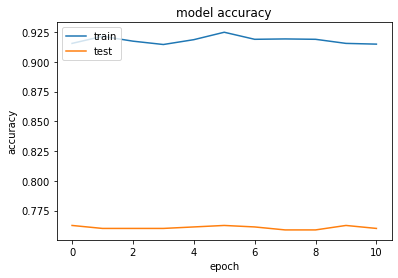

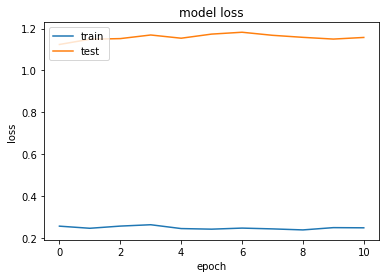

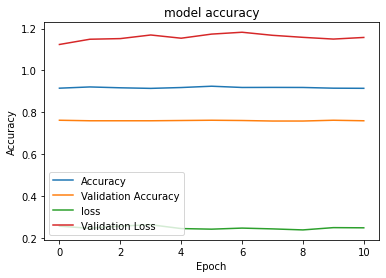

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
my_new_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=Adam(learning_rate=0.0001),metrics=['acc'])

es=EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=10)

mc = ModelCheckpoint("Resnet50_best_model_1.h5", monitor="val_acc", mode="max", save_best_only=True)

resnet_history = my_new_model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 85, epochs = 10, callbacks=[mc,es])

Epoch 1/10
85/85 [==============================] - 46s 479ms/step - loss: 0.0141 - acc: 0.9952 - val_loss: 0.7729 - val_acc: 0.8871
Epoch 2/10
85/85 [==============================] - 40s 472ms/step - loss: 0.0156 - acc: 0.9963 - val_loss: 0.3135 - val_acc: 0.9329
Epoch 3/10
85/85 [==============================] - 41s 480ms/step - loss: 0.0064 - acc: 0.9978 - val_loss: 0.3326 - val_acc: 0.9371
Epoch 4/10
85/85 [==============================] - 40s 467ms/step - loss: 0.0276 - acc: 0.9919 - val_loss: 0.4864 - val_acc: 0.9257
Epoch 5/10
85/85 [==============================] - 39s 462ms/step - loss: 0.0169 - acc: 0.9945 - val_loss: 0.2674 - val_acc: 0.9371
Epoch 6/10
85/85 [==============================] - 39s 457ms/step - loss: 0.0336 - acc: 0.9900 - val_loss: 0.7599 - val_acc: 0.8857
Epoch 7/10
85/85 [==============================] - 40s 470ms/step - loss: 0.0132 - acc: 0.9941 - val_loss: 0.2071 - val_acc: 0.9471
Epoch 8/10
85/85 [==============================] - 40s 471ms/step - 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = my_new_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,))

Confusion Matrix
[[ 96   3   0   0   0   1   0]
 [ 14  86   0   0   0   0   0]
 [  0   0 100   0   0   0   0]
 [  0   0   0  97   0   3   0]
 [  0   0   0   0  97   2   1]
 [  0   0   1   2   0  97   0]
 [  0   0   1   3   0   3  93]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       100
           1       0.97      0.86      0.91       100
           2       0.98      1.00      0.99       100
           3       0.95      0.97      0.96       100
           4       1.00      0.97      0.98       100
           5       0.92      0.97      0.94       100
           6       0.99      0.93      0.96       100

    accuracy                           0.95       700
   macro avg       0.95      0.95      0.95       700
weighted avg       0.95      0.95      0.95       700



In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(resnet_history.history['acc'])
plt.plot(resnet_history.history['val_acc'])
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110]
loss
y=[2.1689,1.9275,1.7550,1.5889,1.4790,1.3775,1.2734,1.1904,1.1253,1.0486,0.9867,0.9508,0.8883,0.8674,0.8132,0.7755,0.7410,0.7142,0.6872,0.6618,0.6344,0.6171,0.5913,0.5745,0.5576,0.5545,0.5317,0.5102,0.5016,0.4890,0.4781,0.4624,0.4658,0.4503,0.4449,0.4313,0.4116,0.4140,0.4047,0.3968,0.3987,0.3842,0.3778,0.3811,0.3661,0.3584,0.3495,0.3532,0.3329,0.3395,0.3262,0.3291,0.3205,0.3135,0.3137,0.3148,0.3083,0.3002,0.2987,0.2978,0.2985,0.2859,0.2871,0.2778,0.2727,0.2745,0.2724,0.2758,0.2644,0.2603,0.2627,0.2711,0.2608,0.2554,0.2453,0.2403,0.2392,0.2397,0.2366,0.2331,0.2362,0.2277,0.2408,0.2283,0.2296,0.2312,0.2217,0.2221,0.2289,0.2163,0.2144,0.2141,0.2135,0.2021,0.2044,0.2119,0.2103,0.2041,0.1967,0.2002,0.0141,0.0156,0.0064,0.0276,0.0169,0.0336,0.0132,0.0051,0.0076,0.0076]
accuracy
z=[0.1313,0.2167,0.2977,0.4009,0.4708,0.5207,0.5880,0.6180,0.6594,0.6897,0.7237,0.7371,0.7507,0.7607,0.7892,0.7936,0.7996,0.8070,0.8229,0.8203,0.8384,0.8388,0.8469,0.8454,0.8524,0.8491,0.8554,0.8621,0.8584,0.8743,0.8750,0.8746,0.8672,0.8746,0.8746,0.8791,0.8898,0.8794,0.8838,0.8905,0.8824,0.8913,0.8939,0.8916,0.8916,0.8990,0.9016,0.9001,0.9061,0.9027,0.9035,0.9016,0.9112,0.9105,0.9064,0.9038,0.9072,0.9197,0.9127,0.9135,0.9090,0.9161,0.9101,0.9175,0.9197,0.9190,0.9172,0.9164,0.9286,0.9212,0.9175,0.9153,0.9231,0.9220,0.9220,0.9279,0.9297,0.9271,0.9294,0.9301,0.9283,0.9305,0.9271,0.9316,0.9305,0.9320,0.9345,0.9301,0.9275,0.9345,0.9360,0.9323,0.9379,0.9382,0.9401,0.9382,0.9371,0.9364,0.9438,0.9427,0.9952,0.9963,0.9978,0.9919,0.9945,0.9900,0.9941,0.9982,0.9978,0.9982]
val loss
w=[2.1259,2.2261,2.3219,2.4682,2.5824,2.6765,2.6903,2.5205,2.1974,1.8222,1.4693,1.1970,1.0061,0.8955,0.8251,0.7740,0.7355,0.7035,0.6769,0.6550,0.6361,0.6160,0.5969,0.5799,0.5622,0.5484,0.5349,0.5230,0.5099,0.4990,0.4885,0.4786,0.4711,0.4624,0.4523,0.4435,0.4369,0.4287,0.4216,0.4167,0.4109,0.4043,0.3983,0.3921,0.3899,0.3854,0.3797,0.3741,0.3699,0.3664,0.3615,0.3581,0.3553,0.3511,0.3467,0.3431,0.3394,0.3372,0.3337,0.3309,0.3266,0.3235,0.3211,0.3200,0.3156,0.3136,0.3103,0.3102,0.3055,0.3034,0.3009,0.3002,0.2982,0.2968,0.2951,0.2946,0.2905,0.2884,0.2867,0.2851,0.2831,0.2807,0.2788,0.2778,0.2771,0.2758,0.2734,0.2718,0.2723,0.2707,0.2670,0.2679,0.2663,0.2656,0.2654,0.2647,0.2624,0.2412,0.2603,0.2583,0.2729,0.2135,0.2326,0.2864,0.2674,0.2599,0.2071,0.2087,0.2114,0.2057]
val accuracy
v=[0.0914,0.1314,0.1586,0.2043,0.1986,0.1800,0.1514,0.1557,0.1814,0.2486,0.3857,0.5743,0.6700,0.7357,0.7543,0.7814,0.7900,0.7957,0.8029,0.8157,0.8171,0.8214,0.8243,0.8300,0.8300,0.8357,0.8357,0.8386,0.8414,0.8400,0.8443,0.8457,0.8471,0.8514,0.8557,0.8571,0.8557,0.8614,0.8629,0.8571,0.8614,0.8643,0.8671,0.8643,0.8714,0.8714,0.8729,0.8743,0.8786,0.8786,0.8786,0.8786,0.8786,0.8814,0.8800,0.8814,0.8843,0.8843,0.8857,0.8857,0.8886,0.8886,0.8900,0.8871,0.8914,0.8914,0.8943,0.8943,0.9000,0.9014,0.9043,0.9043,0.9071,0.9071,0.9057,0.9057,0.9071,0.9100,0.9086,0.9100,0.9086,0.9100,0.9100,0.9100,0.9100,0.9100,0.9114,0.9129,0.9100,0.9100,0.9171,0.9129,0.9171,0.9157,0.9129,0.9129,0.9114,0.9143,0.9143,0.9114,0.9271,0.9329,0.9371,0.9257,0.9371,0.9377,0.9471,0.9514,0.9400,0.9514]
plt.plot(x,z)
plt.plot(x,v)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

SyntaxError: ignored

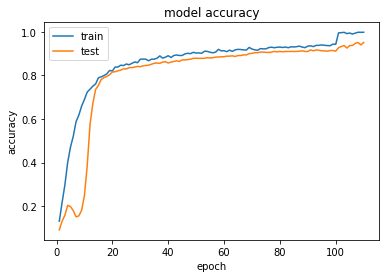

In [ ]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110]

y=[2.1689,1.9275,1.7550,1.5889,1.4790,1.3775,1.2734,1.1904,1.1253,1.0486,0.9867,0.9508,0.8883,0.8674,0.8132,0.7755,0.7410,0.7142,0.6872,0.6618,0.6344,0.6171,0.5913,0.5745,0.5576,0.5545,0.5317,0.5102,0.5016,0.4890,0.4781,0.4624,0.4658,0.4503,0.4449,0.4313,0.4116,0.4140,0.4047,0.3968,0.3987,0.3842,0.3778,0.3811,0.3661,0.3584,0.3495,0.3532,0.3329,0.3395,0.3262,0.3291,0.3205,0.3135,0.3137,0.3148,0.3083,0.3002,0.2987,0.2978,0.2985,0.2859,0.2871,0.2778,0.2727,0.2745,0.2724,0.2758,0.2644,0.2603,0.2627,0.2711,0.2608,0.2554,0.2453,0.2403,0.2392,0.2397,0.2366,0.2331,0.2362,0.2277,0.2408,0.2283,0.2296,0.2312,0.2217,0.2221,0.2289,0.2163,0.2144,0.2141,0.2135,0.2021,0.2044,0.2119,0.2103,0.2041,0.1967,0.2002,0.0141,0.0156,0.0064,0.0276,0.0169,0.0336,0.0132,0.0051,0.0076,0.0076]

z=[0.1313,0.2167,0.2977,0.4009,0.4708,0.5207,0.5880,0.6180,0.6594,0.6897,0.7237,0.7371,0.7507,0.7607,0.7892,0.7936,0.7996,0.8070,0.8229,0.8203,0.8384,0.8388,0.8469,0.8454,0.8524,0.8491,0.8554,0.8621,0.8584,0.8743,0.8750,0.8746,0.8672,0.8746,0.8746,0.8791,0.8898,0.8794,0.8838,0.8905,0.8824,0.8913,0.8939,0.8916,0.8916,0.8990,0.9016,0.9001,0.9061,0.9027,0.9035,0.9016,0.9112,0.9105,0.9064,0.9038,0.9072,0.9197,0.9127,0.9135,0.9090,0.9161,0.9101,0.9175,0.9197,0.9190,0.9172,0.9164,0.9286,0.9212,0.9175,0.9153,0.9231,0.9220,0.9220,0.9279,0.9297,0.9271,0.9294,0.9301,0.9283,0.9305,0.9271,0.9316,0.9305,0.9320,0.9345,0.9301,0.9275,0.9345,0.9360,0.9323,0.9379,0.9382,0.9401,0.9382,0.9371,0.9364,0.9438,0.9427,0.9952,0.9963,0.9978,0.9919,0.9945,0.9900,0.9941,0.9982,0.9978,0.9982]

w=[2.1259,2.2261,2.3219,2.4682,2.5824,2.6765,2.6903,2.5205,2.1974,1.8222,1.4693,1.1970,1.0061,0.8955,0.8251,0.7740,0.7355,0.7035,0.6769,0.6550,0.6361,0.6160,0.5969,0.5799,0.5622,0.5484,0.5349,0.5230,0.5099,0.4990,0.4885,0.4786,0.4711,0.4624,0.4523,0.4435,0.4369,0.4287,0.4216,0.4167,0.4109,0.4043,0.3983,0.3921,0.3899,0.3854,0.3797,0.3741,0.3699,0.3664,0.3615,0.3581,0.3553,0.3511,0.3467,0.3431,0.3394,0.3372,0.3337,0.3309,0.3266,0.3235,0.3211,0.3200,0.3156,0.3136,0.3103,0.3102,0.3055,0.3034,0.3009,0.3002,0.2982,0.2968,0.2951,0.2946,0.2905,0.2884,0.2867,0.2851,0.2831,0.2807,0.2788,0.2778,0.2771,0.2758,0.2734,0.2718,0.2723,0.2707,0.2670,0.2679,0.2663,0.2656,0.2654,0.2647,0.2624,0.2412,0.2403,0.2483,0.2229,0.2135,0.2326,0.2864,0.2674,0.2599,0.2071,0.2087,0.2114,0.2057]

v=[0.0914,0.1314,0.1586,0.2043,0.1986,0.1800,0.1514,0.1557,0.1814,0.2486,0.3857,0.5743,0.6700,0.7357,0.7543,0.7814,0.7900,0.7957,0.8029,0.8157,0.8171,0.8214,0.8243,0.8300,0.8300,0.8357,0.8357,0.8386,0.8414,0.8400,0.8443,0.8457,0.8471,0.8514,0.8557,0.8571,0.8557,0.8614,0.8629,0.8571,0.8614,0.8643,0.8671,0.8643,0.8714,0.8714,0.8729,0.8743,0.8786,0.8786,0.8786,0.8786,0.8786,0.8814,0.8800,0.8814,0.8843,0.8843,0.8857,0.8857,0.8886,0.8886,0.8900,0.8871,0.8914,0.8914,0.8943,0.8943,0.9000,0.9014,0.9043,0.9043,0.9071,0.9071,0.9057,0.9057,0.9071,0.9100,0.9086,0.9100,0.9086,0.9100,0.9100,0.9100,0.9100,0.9100,0.9114,0.9129,0.9100,0.9100,0.9171,0.9129,0.9171,0.9157,0.9129,0.9129,0.9114,0.9143,0.9143,0.9114,0.9271,0.9329,0.9371,0.9257,0.9371,0.9377,0.9471,0.9514,0.9400,0.9514]
plt.plot(x,z)
plt.plot(x,v)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

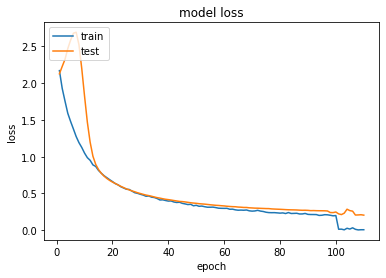

In [ ]:
plt.plot(x,y)
plt.plot(x,w)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()